<a href="https://colab.research.google.com/github/sakamoto-hands-on/Python_Practical_DataAnalysis100/blob/master/06_Optimizing_LogisticsRoute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [2]:
factories = pd.read_csv("tbl_factory.csv", index_col=0)
factories

,FCName,FCDemand,FCRegion
FCID,,,
FC00001,東京工場,28,関東
FC00002,木更津工場,29,関東
FC00003,多摩工場,31,関東
FC00004,横須賀工場,25,関東
FC00005,仙台工場,21,東北
FC00006,山形工場,30,東北
FC00007,那須工場,25,東北
FC00008,青森工場,16,東北


In [4]:
warehouses = pd.read_csv("tbl_warehouse.csv", index_col=0)
warehouses 

,WHName,WHSupply,WHRegion
WHID,,,
WH00001,杉並倉庫,35,関東
WH00002,品川倉庫,41,関東
WH00003,豊洲倉庫,42,関東
WH00004,郡山倉庫,60,東北
WH00005,仙台倉庫,72,東北
WH00006,山形倉庫,65,東北


In [5]:
cost = pd.read_csv("rel_cost.csv", index_col=0)
cost 

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8
6,FC00002,WH00003,1.6
7,FC00003,WH00001,1.2
8,FC00003,WH00002,1.3
9,FC00003,WH00003,1.5


In [6]:
trans = pd.read_csv("tbl_transaction.csv", index_col=0)
trans 

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30
...,...,...,...,...
3995,2019-12-31 11:27:51,FC00007,WH00006,29
3996,2019-12-31 17:10:21,FC00002,WH00003,35
3997,2019-12-31 19:35:07,FC00003,WH00001,36


##４つのテーブルをジョイン

In [8]:
join_data = pd.merge(trans, cost, left_on=["ToFC","FromWH"], right_on=["FCID","WHID"], how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8


In [10]:
join_data = pd.merge(join_data, factories, left_on="ToFC", right_on="FCID", how="left") 
join_data.head() 

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName_x,FCDemand_x,FCRegion_x,FCName_y,FCDemand_y,FCRegion_y
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,横須賀工場,25,関東,横須賀工場,25,関東
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,那須工場,25,東北,那須工場,25,東北
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,山形工場,30,東北,山形工場,30,東北
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,木更津工場,29,関東,木更津工場,29,関東
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,東京工場,28,関東,東京工場,28,関東


In [13]:
join_data = pd.merge(join_data, warehouses, left_on="FromWH", right_on="WHID", how="left")
join_data = join_data[["TransactionDate","Quantity","Cost","ToFC","FCName_x","FCDemand_x","FromWH","WHName_x","WHSupply_x","WHRegion_x"]]
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName_x,FCDemand_x,FromWH,WHName_x,WHSupply_x,WHRegion_x
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東


関東支社と東北支社のデータを比較

In [15]:
kanto = join_data.loc[join_data["WHRegion_x"]=="関東"]
kanto.head()

,TransactionDate,Quantity,Cost,ToFC,FCName_x,FCDemand_x,FromWH,WHName_x,WHSupply_x,WHRegion_x
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東
7,2019-01-01 09:09:30,12,1.5,FC00001,東京工場,28,WH00003,豊洲倉庫,42,関東
8,2019-01-01 10:52:55,27,1.5,FC00003,多摩工場,31,WH00003,豊洲倉庫,42,関東


In [16]:
tohoku = join_data.loc[join_data["WHRegion_x"]=="東北"]
tohoku.head()

,TransactionDate,Quantity,Cost,ToFC,FCName_x,FCDemand_x,FromWH,WHName_x,WHSupply_x,WHRegion_x
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
5,2019-01-01 08:56:09,31,0.3,FC00005,仙台工場,21,WH00005,仙台倉庫,72,東北
6,2019-01-01 09:00:15,33,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北
9,2019-01-01 14:12:51,21,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北


##現状の輸送量、コストを確認

In [17]:
print("関東支社の総コスト：" + str(kanto["Cost"].sum()) + "万円")
print("東北支社の総コスト：" + str(tohoku["Cost"].sum()) + "万円")

関東支社の総コスト：2189.3万円
東北支社の総コスト：2062.0万円


In [19]:
print("関東支社の総部品輸送個数：" + str(kanto["Quantity"].sum()) + "個")
print("東北支社の総部品輸送個数：" + str(tohoku["Quantity"].sum()) + "個")

関東支社の総部品輸送個数：49146個
東北支社の総部品輸送個数：50214個


In [20]:
tmp = (kanto["Cost"].sum() / kanto["Quantity"].sum()) * 10000
print("関東支社の部品１つあたりの輸送コスト：" + str(int(tmp)) + "円")
tmp = (tohoku["Cost"].sum() / tohoku["Quantity"].sum()) * 10000
print("東北支社の部品１つあたりの輸送コスト：" + str(int(tmp)) + "円")


関東支社の部品１つあたりの輸送コスト：445円
東北支社の部品１つあたりの輸送コスト：410円


In [21]:
cost_chk = pd.merge(cost, factories, on="FCID", how="left")
print("東京支社の平均輸送コスト：" + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="関東"].mean()) + "万円")
print("東北支社の平均輸送コスト：" + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="東北"].mean()) + "万円")

東京支社の平均輸送コスト：1.075万円
東北支社の平均輸送コスト：1.05万円


##ネットワークを可視化

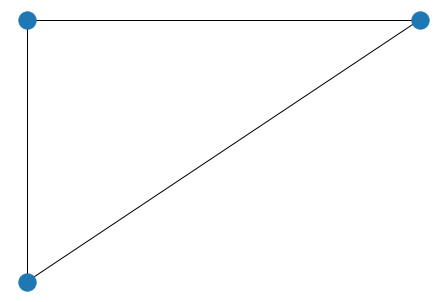

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()

G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")

G.add_edge("nodeA","nodeB")
G.add_edge("nodeA","nodeC")
G.add_edge("nodeB","nodeC")

pos={}
pos["nodeA"]=(0,0)
pos["nodeB"]=(1,1)
pos["nodeC"]=(0,1)

nx.draw(G,pos)

plt.show()

##ネットワークにノードを追加

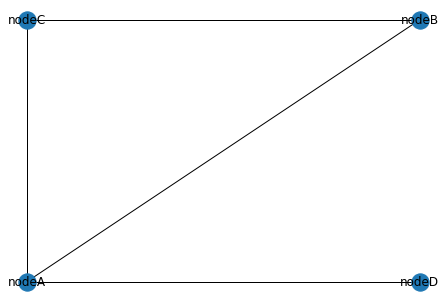

In [24]:
G.add_node("nodeD")

G.add_edge("nodeA","nodeD")

pos["nodeD"]=(1,0)

nx.draw(G,pos, with_labels=True)

##ルートの重みづけを実施

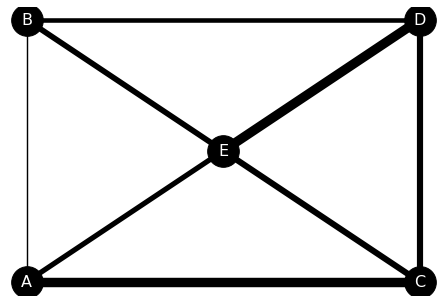

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

df_w = pd.read_csv('network_weight.csv')
df_p = pd.read_csv('network_pos.csv')

size = 10
edge_weights = []
for i in range(len(df_w)):
  for j in range(len(df_w.columns)):
    edge_weights.append(df_w.iloc[i][j]*size)

G = nx.Graph()

for i in range(len(df_w.columns)):
  G.add_node(df_w.columns[i])

for i in range(len(df_w.columns)):
  for j in range(len(df_w.columns)):
    G.add_edge(df_w.columns[i],df_w.columns[j])

pos = {}
for i in range(len(df_w.columns)):
  node = df_w.columns[i]
  pos[node] = (df_p[node][0],df_p[node][1])

nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='k',font_color='w', width=edge_weights)

plt.show()


In [28]:
df_w

,A,B,C,D,E
0,0.639921,0.143353,0.944669,0.521848,0.000000
1,0.264556,0.000000,0.456150,0.568434,0.000000
2,0.617635,0.612096,0.616934,0.943748,0.000000
3,0.000000,0.000000,0.697631,0.060225,0.666767
4,0.670638,0.210383,0.000000,0.315428,0.000000


In [29]:
edge_weights

[6.39921,
 1.4335300000000002,
 9.44669,
 5.21848,
 0.0,
 2.64556,
 0.0,
 4.5615,
 5.68434,
 0.0,
 6.17635,
 6.12096,
 6.16934,
 9.437479999999999,
 0.0,
 0.0,
 0.0,
 6.97631,
 0.60225,
 6.66767,
 6.706379999999999,
 2.10383,
 0.0,
 3.1542800000000004,
 0.0]

##輸送ルート情報を読み込む

In [30]:
df_tr = pd.read_csv('trans_route.csv', index_col="工場")
df_tr.head()

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


##輸送ルート情報からネットワークを可視化

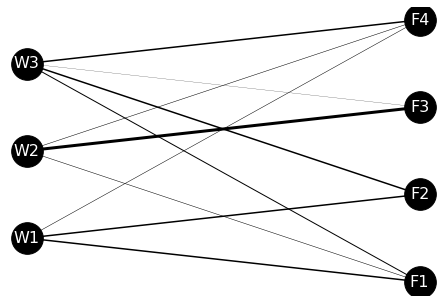

In [35]:
df_pos = pd.read_csv('trans_route_pos.csv')

G = nx.Graph()

for i in range(len(df_pos.columns)):
  G.add_node(df_pos.columns[i])

num_pre = 0
edge_weights = []
size = 0.1
for i in range(len(df_pos.columns)):
  for j in range(len(df_pos.columns)):
    if not (i==j):
      G.add_edge(df_pos.columns[i],df_pos.columns[j])
      if num_pre<len(G.edges):
        num_pre = len(G.edges)
        weight = 0
        if (df_pos.columns[i] in df_tr.columns)and(df_pos.columns[i] in df_tr.index):
          if df_tr[df_pos.columns[i]][df_pos.columns[j]]:
            weight = df_tr[df_pos.columns[i]][df_pos.columns[j]]*size
        elif(df_pos.columns[j] in df_tr.columns)and(df_pos.columns[i] in df_tr.index):
          if df_tr[df_pos.columns[j]][df_pos.columns[i]]:
            weight = df_tr[df_pos.columns[j]][df_pos.columns[i]]*size
        edge_weights.append(weight)

pos = {}
for i in range(len(df_pos.columns)):
  node = df_pos.columns[i]
  pos[node] = (df_pos[node][0],df_pos[node][1])

nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='k', font_color='w', width=edge_weights)

plt.show()


In [36]:
df_pos

,W1,W2,W3,F1,F2,F3,F4
0,0,0,0,4.0,4.0,4.0,4.0
1,1,2,3,0.5,1.5,2.5,3.5


##輸送コスト関数を作成

In [37]:
df_tc = pd.read_csv('trans_cost.csv', index_col="工場")

def trans_cost(df_tr,df_tc):
  cost=0
  for i in range(len(df_tc.index)):
    for j in range(len(df_tr.columns)):
      cost+=df_tr.iloc[i][j]*df_tc.iloc[i][j]
  return cost

print("総輸送コスト：" + str(trans_cost(df_tr,df_tc)))

総輸送コスト：1493


In [38]:
df_tc.head()

,F1,F2,F3,F4
工場,,,,
W1,10,10,11,27
W2,18,21,12,14
W3,15,12,14,12


##制約条件を作る

In [0]:
df_demand = pd.read_csv('demand.csv')
df_supply = pd.read_csv('supply.csv')

In [40]:
for i in range(len(df_demand.columns)):
  temp_sum = sum(df_tr[df_demand.columns[i]])
  print(str(df_demand.columns[i]) + "への輸送量：" + str(temp_sum) + "（需要量：" + str(df_demand.iloc[0][i]) + ")")
  if temp_sum>df_demand.iloc[0][i]:
    print("需要量を満たしています")
  else:
    print("需要量を満たしていません。輸送ルートを再計算してください")

for i in range(len(df_supply.columns)):
  temp_sum = sum(df_tr.loc[df_supply.columns[i]])
  print(str(df_supply.columns[i]) + "からの輸送量：" + str(temp_sum) + "(供給限界：" + str(df_supply.iloc[0][i]) + ")")
  if temp_sum<=df_supply.iloc[0][i]:
    print("供給限界の範囲内です")
  else:
    print("供給限界を超過しています。輸送ルートを再計算してください。")


F1への輸送量：30（需要量：28)
需要量を満たしています
F2への輸送量：30（需要量：29)
需要量を満たしています
F3への輸送量：32（需要量：31)
需要量を満たしています
F4への輸送量：25（需要量：25)
需要量を満たしていません。輸送ルートを再計算してください
W1からの輸送量：35(供給限界：35)
供給限界の範囲内です
W2からの輸送量：40(供給限界：41)
供給限界の範囲内です
W3からの輸送量：42(供給限界：42)
供給限界の範囲内です


##輸送ルートを変更して、輸送コスト関数の変化を確認

In [41]:
df_tr_new = pd.read_csv('trans_route_new.csv', index_col="工場")
print(df_tr_new)

print("総輸送コスト(変更後)：" + str(trans_cost(df_tr_new, df_tc)))

    F1  F2  F3  F4
工場                
W1  15  15   0   0
W2   5   0  30  10
W3  10  15   2  15
総輸送コスト(変更後)：1428


In [46]:
def condition_demand(dr_tr, df_demand):
  flag = np.zeros(len(df_demand.columns))
  for i in range(len(df_demand.columns)):
    temp_sum = sum(df_tr[df_demand.columns[i]])
    if (temp_sum>=df_demand.iloc[0][i]):
      flag[i] = 1
  return flag
  
def condition_supply(dr_tr, df_supply):
  flag = np.zeros(len(df_supply.columns))
  for i in range(len(df_supply.columns)):
    temp_sum = sum(df_tr.loc[df_supply.columns[i]])
    if (temp_sum>=df_supply.iloc[0][i]):
      flag[i] = 1
  return flag

print("需要条件計算結果：" + str(condition_demand(df_tr_new,df_demand)))
print("供給条件計算結果：" + str(condition_supply(df_tr_new,df_supply)))

需要条件計算結果：[1. 1. 1. 1.]
供給条件計算結果：[1. 0. 1.]
